# Rel Plot
it stads for relational plot. With it you can access both scatter plot and the line plot, you can also be able to create small multiples sincce rel plot is build on the top of facet grid.

### Importig libraries

In [1]:
import seaborn as sns
sns.set_style('darkgrid')

### Loading the data

In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Create a new column with age decade bukcet for each passenger.

In [3]:
df['decade']=[age//10*10 for age in df.age]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,decade
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30.0


### Creating a relplot

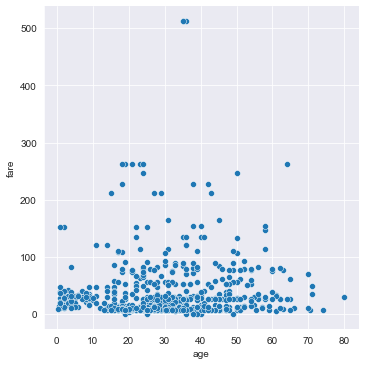

In [4]:
sns.relplot(data=df, x='age', y='fare');
#doesn't really show a good correlation

### Categorical variables

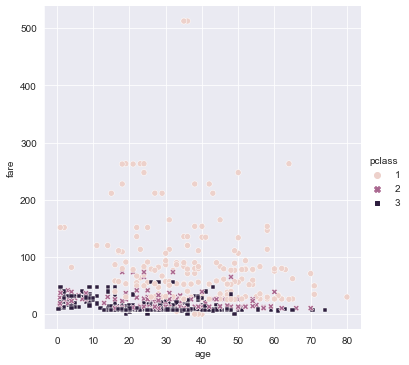

In [5]:
#Hue and Style for categorical variable
#using them on the same variable
sns.relplot(data=df, x='age', y='fare', hue='pclass', style='pclass');

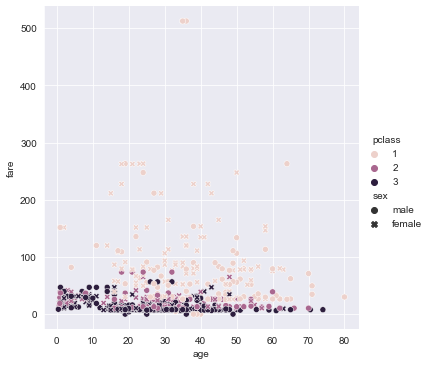

In [6]:
#using them on the different varaibles
sns.relplot(data=df, x='age', y='fare', hue='pclass', style='sex');

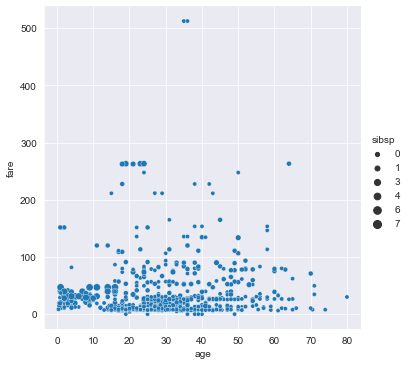

In [7]:
#using size for representing a categorical variable
sns.relplot(data=df, x='age', y='fare', size='sibsp');

### Kind

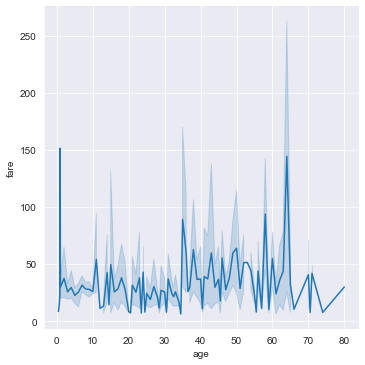

In [8]:
#Kind : it is used for changing the type
sns.relplot(data=df, x='age', y='fare', kind='line');
#the age is data is quite grannual, therefore we are getting lot of variance

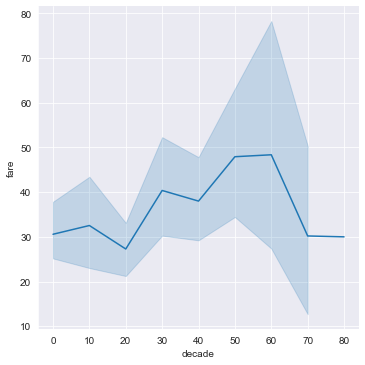

In [9]:
#let's try with the decade column
sns.relplot(data=df, x='decade', y='fare', kind='line');

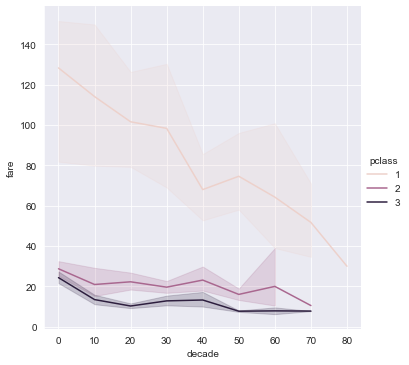

In [10]:
#adding categorical variable here through hue
sns.relplot(data=df, x='decade', y='fare', kind='line', hue='pclass');

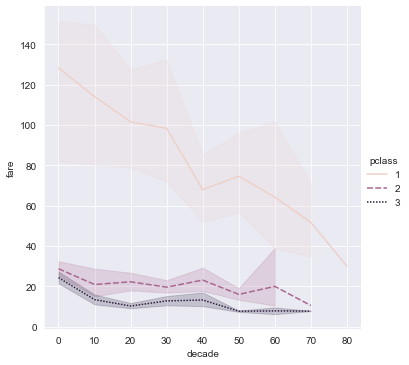

In [11]:
#changing the style of the lines
sns.relplot(data=df, x='decade', y='fare', kind='line', hue='pclass', style='pclass');

### RelPlot with FacetGrid

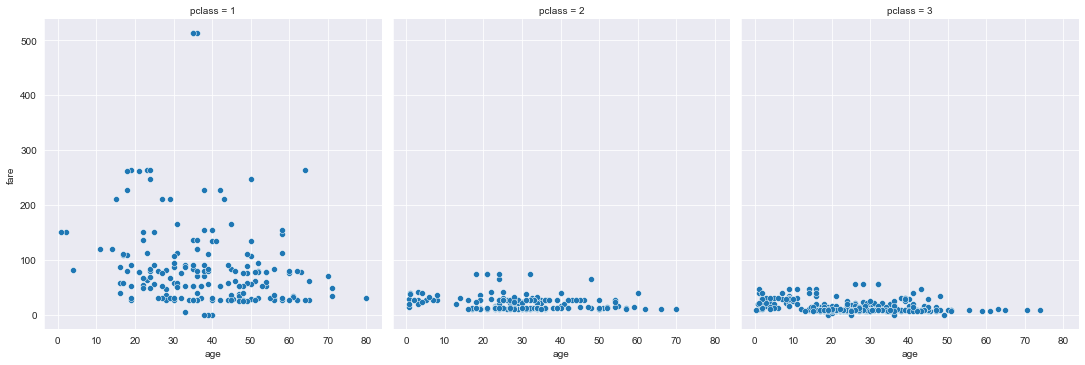

In [12]:
sns.relplot(data=df, x='age', y='fare', col='pclass');

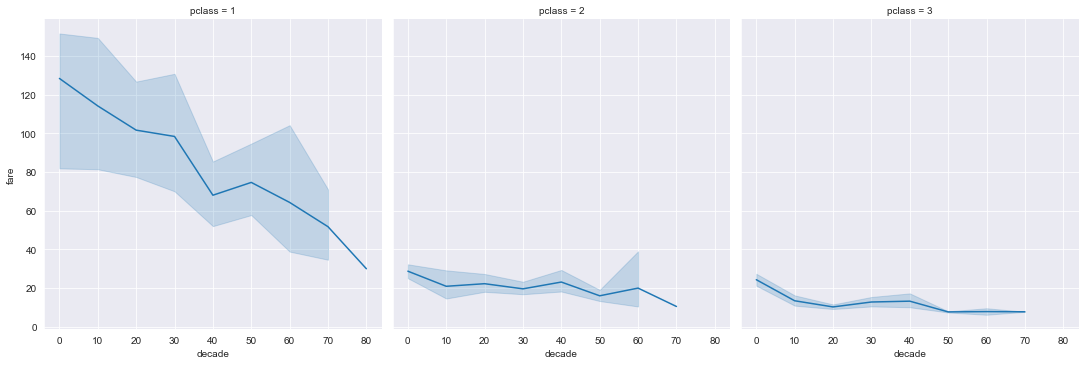

In [13]:
sns.relplot(data=df, x='decade', y='fare', col='pclass', kind='line');

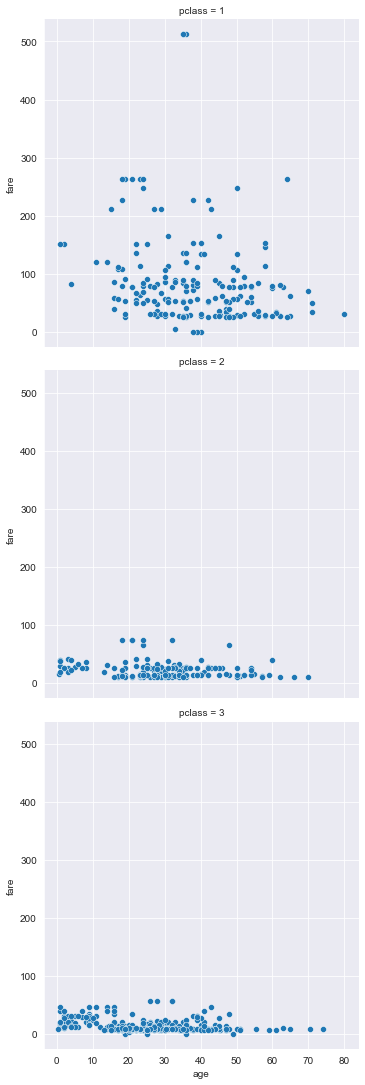

In [14]:
#instead of columns we can also have these plots as a row
sns.relplot(data=df, x='age', y='fare', row='pclass');

#### col_wrap
It is used when there are multiple unique values for the attribute to plotted on the and column

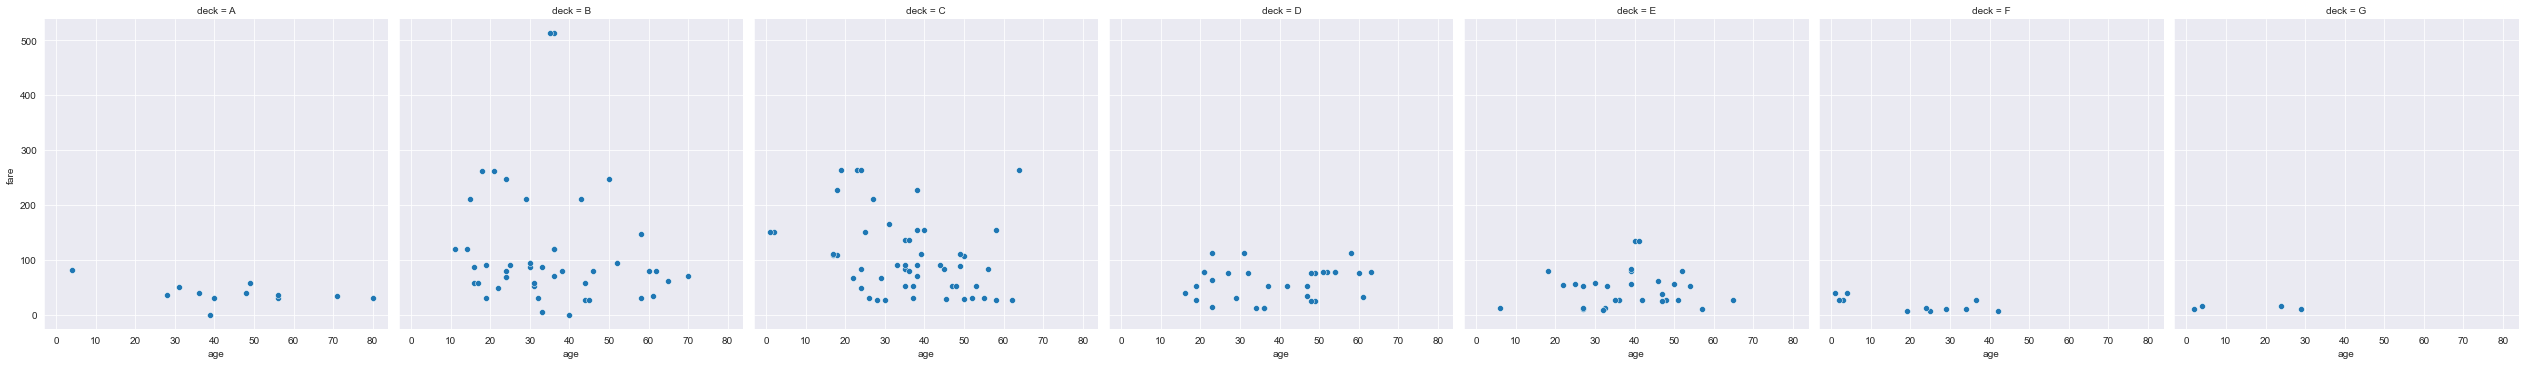

In [15]:
#e.g.
sns.relplot(data=df, x='age', y='fare', col='deck');

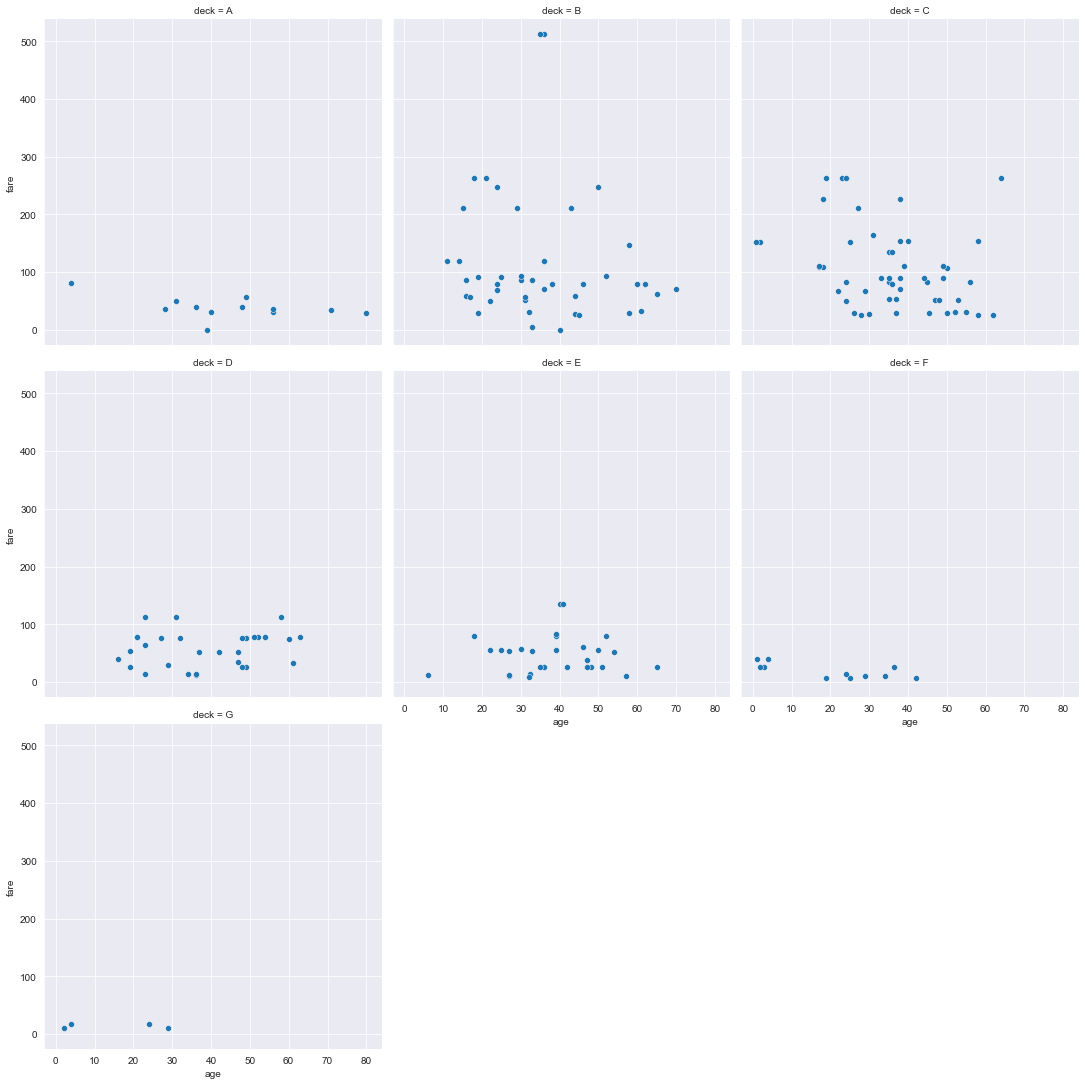

In [16]:
#wrapping the columns
sns.relplot(data=df, x='age', y='fare', col='deck', col_wrap=3);

### Styling

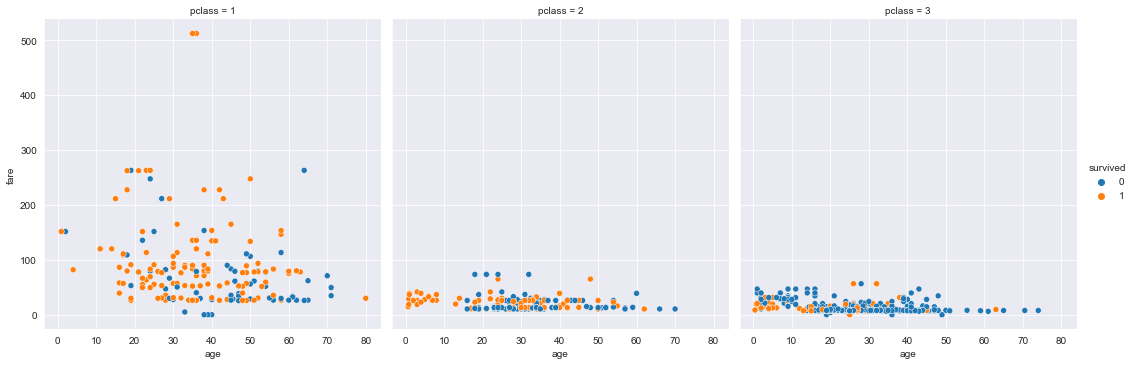

In [17]:
#Hue for survived and didnt survied
sns.relplot(data=df, x='age', y='fare', col='pclass', hue='survived');

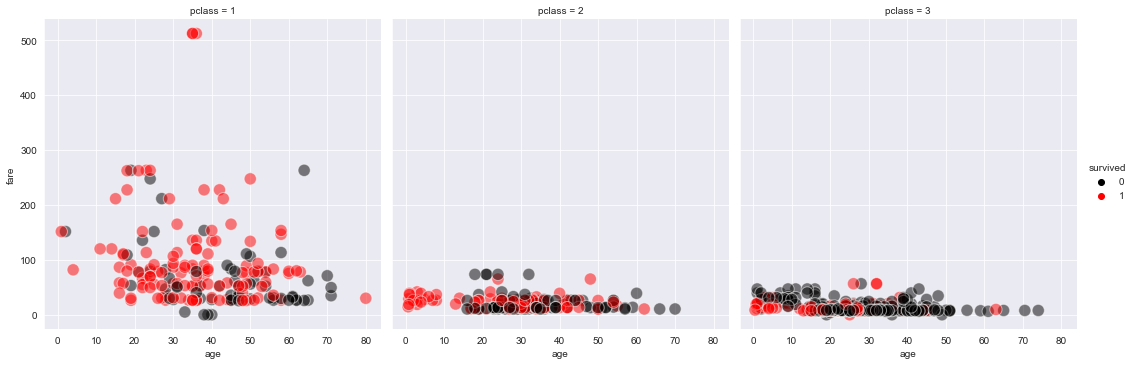

In [18]:
#Size of the dots and palette
#transperency and edge for the dots
sns.relplot(data=df, x='age', y='fare', col='pclass', hue='survived', s=150, palette=['black','red'], alpha=0.5, linewidth=1);

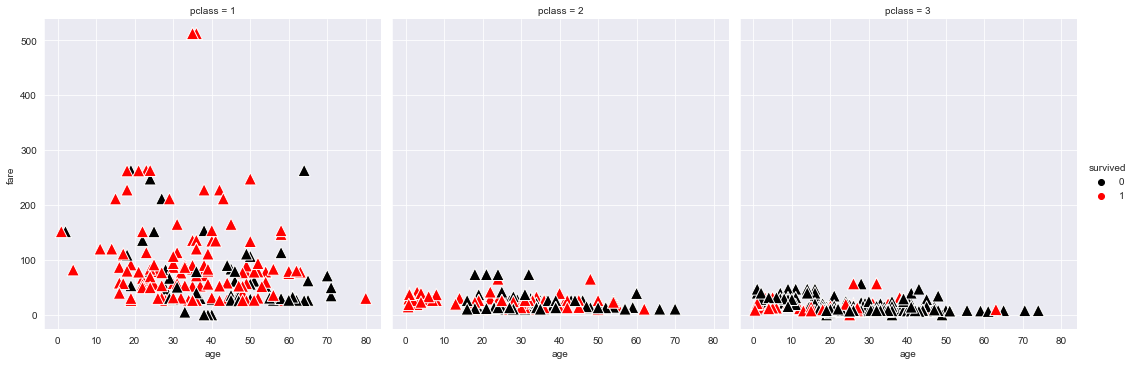

In [19]:
#using Marker
#changing the data points from the circle to the triangles
sns.relplot(data=df, x='age', y='fare', col='pclass', hue='survived', s=150, palette=['black','red'], marker='^');

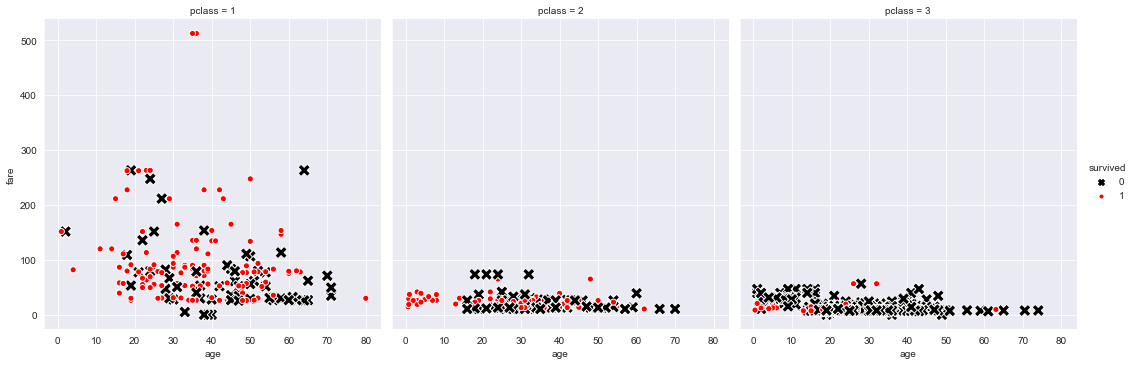

In [20]:
#Assigning the markers according to our need
sns.relplot(data=df, x='age', y='fare', col='pclass', hue='survived', s=150, palette=['black','red'], style='survived', markers=['X','.']);

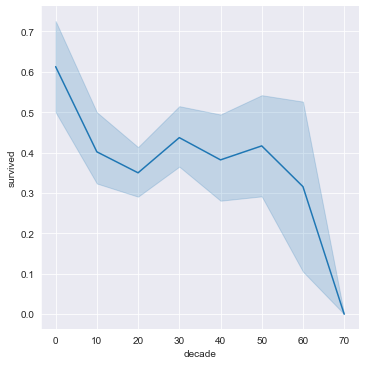

In [21]:
#styling with line plot
sns.relplot(data=df[df.age<=70], x='decade', y='survived', kind='line');

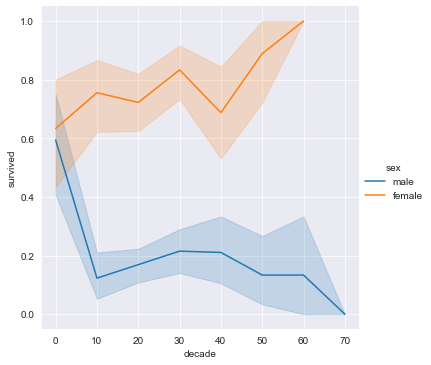

In [22]:
#changing the hue for male and female
sns.relplot(data=df[df.age<=70], x='decade', y='survived', kind='line', hue='sex');
#number of female survived survivals is more

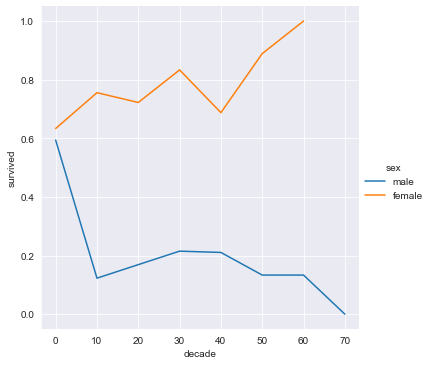

In [23]:
#turning off the confidence interval
g=sns.relplot(data=df[df.age<=70], x='decade', y='survived', kind='line', hue='sex', ci=None);

In [24]:
type(g)
#it's a FacetGrid object
#therefore we can use all the facetgrid methods in here

seaborn.axisgrid.FacetGrid

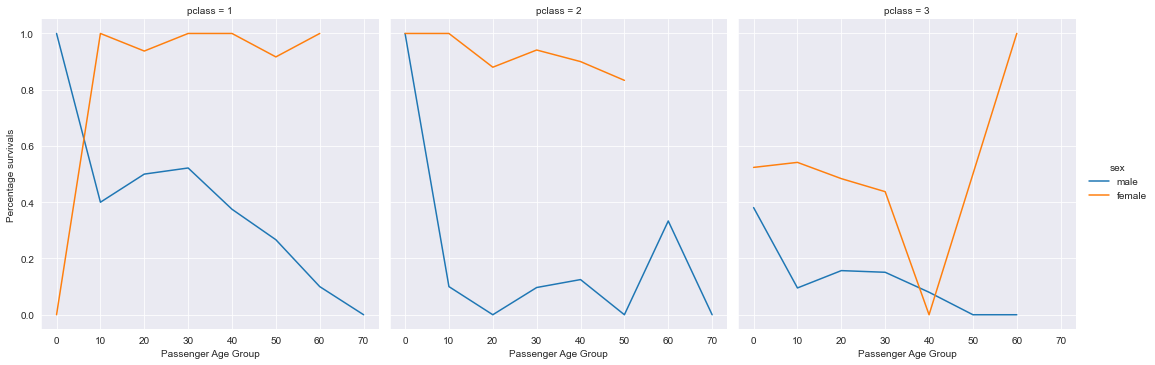

In [25]:
g=sns.relplot(data=df[df.age<=70], x='decade', y='survived', kind='line', hue='sex', ci=None, col='pclass');
#setting the labels
g.set_xlabels('Passenger Age Group')
g.set_ylabels('Percentage survivals');

The End